# Visualización Aplicada: Intro a Seaborn

### Consideraciones Generales en Visualización

* La visualización para el **análisis NO es** la visualización para **presentar el resultado** del análisis

+ Primero, porque **TIENEN OBJETIVOS DISTINTOS**. El análisis nos sirve para extraer información importante, respuestas a nuestras preguntas. La presentación de resultados tiene como objetivo como mostrar esa información de la forma más relevante para el destinatrario de esos resultados.
+ 
Segundo, porque generalmente **TIENEN PÚBLICOS DISTINTOS**. El análisis es para ti o para un grupo de colaboradores (el análisis no es para tus jefes, salvo que sea colaborador en el proyecto, si tienes que mostrar el análisis a jefes consideralo una Presentación aunque en esa sí puedas/debas enseñar mucho del cómo). La presentación es para el que ha encargado el proyecto, para convencer a un tercero, para informar, para quedar tú como el gran sultán de los datos (es decir para un conjunto de "espectadores"), etc, etc.

De lo anterior surgen dos primeras guías importantes para  las visualizaciones:

+ En una ánalisis tus visualizaciones pueden contener todos los datos comparados que tu cerebro pueda admitir. El límite lo pones tú o el grupo de trabajo.

+ En una presentación la cantidad de información de la visualización depende del objetivo de la presentación. Si:

    * Es una **presentación de resultados y conclusiones**: La visualización debe contener **uno o como mucho dos DATOS destacados**, el resto aparecer como complemento estético o comparativo (no importa el dato en sí sino lo que refuerza o debilita a los anteriores), **por mensaje**. Y esos dos DATOS no son cualesquiera son los que mejor y más apoyen el mensaje que quieres transmitir.

    * Es una **exposición** de los mismos, por ejemplo **una infografía**: Entonces debe contener la mayor cantidad de **datos relevantes**, expuestos de la forma más **clara, significativa y separada** posible. 

### Seaborn y Matpotlib
**Seaborn** es una biblioteca de visualización de datos en Python que está construida sobre Matplotlib. Se puede considerar como una extensión o un "wrapper" de Matplotlib que proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos y más informativos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("./data/titanic.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/titanic.csv'

* Matplotlib es muy potente y fexible, pero Seaborn tiene una interfaz más accesible y estilos por defecto que son visualmente más atractivos. Seaborn integra de manera más profunda las estructuras de datos de Pandas y agrega capacidades de visualización estadística. Esto incluye funciones para crear gráficos complejos con menos código, como gráficos de distribución, matrices de correlación y muchos más. Por ejemplo, generar un gráfico de violín o un mapa de calor es más sencillo y directo con Seaborn.

* Además Seaborn nació con Pandas en la cabeza y facilita la visualización directa de DataFrames de Pandas, lo que es ideal para el análisis de datos.

#### Ejemplo 1: *Pinta Seaborn, decora Matplotlib*

In [ ]:
sns.boxplot(x = "who", y = "fare", data = df)

plt.title("comparacion de who con fare en el dataset de titanic")
plt.xlabel("who")
plt.ylabel("fare")



#### Ejemplo 2: *Configura Matplotlib, pinta Seaborn*

NameError: name 'df' is not defined

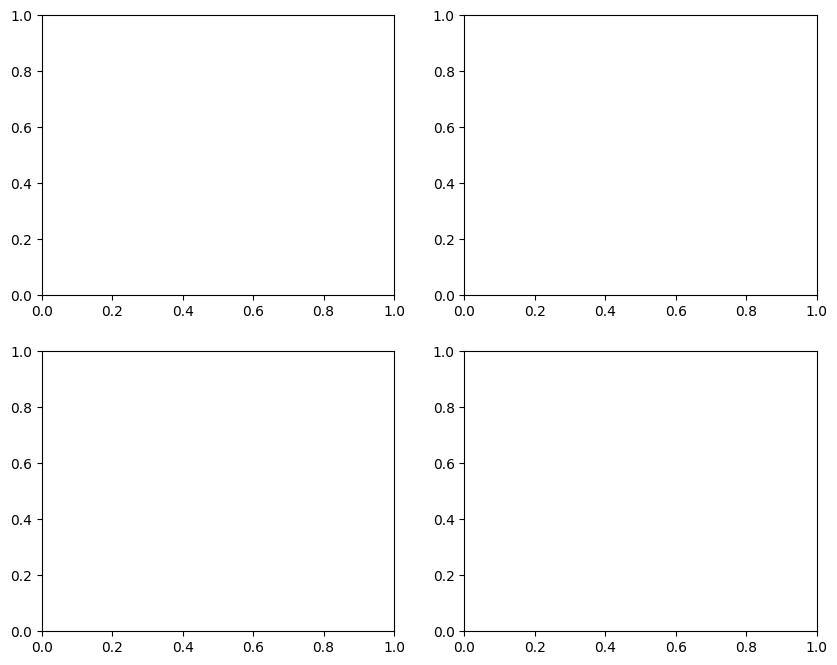

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) #fig y axs, creamos subplot de matriz x 2x2 figuras de 10x8 de alto, que nos devuelve un objeto fig y un array de objetos axes, que van a xs

# Primer subplot con un gráfico de Seaborn
sns.boxplot(x='who', y='fare', data=df, ax=axs[0, 0])

# Segundo subplot con otro gráfico de Seaborn
sns.scatterplot(x='age', y='fare', data=df, ax=axs[0, 1])

# Tercer subplot
sns.histplot(df['age'], kde=True, ax=axs[1, 0])

# Cuarto subplot
sns.violinplot(x='embark_town', y='age', data=df, ax=axs[1, 1]);

axs[0,0].set_title("who vs fare")
axs[0,1].set_title("age vs fare")
axs[1,0].set_title("Distrib. Age")
axs[1,1].set_title("Embarked_town vs Age, violins")

plt.tight_layout()


# Visualización Aplicada: Mostrando una Variable Categórica

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

* **Cuándo**: Análisis univariante de frecuencias y presentación de distribución de valores cuando esto aporte algo (en general para introducciones y dar contexto). Los diagramas de tarta y queso funcionan mejor con frecuencias relativas que con absolutas. Los lolipops no son de mi gusto, pero para que tengas otros.

* **Cuándo no**: Incluso en la situación de que sea necesario por dar contexto hablar de los valores de una variable categórica, si la cardinalidad es mayor de 5 (más o menos) reducirla mostrando 4-5 valores como mucho colapsando los no interesantes en un grupo "otros" (ojo, los no interesantes no son los de menor frecuencia son los que no aporten nada a los mensajes a transmitir )

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/titanic.csv'

### Barras

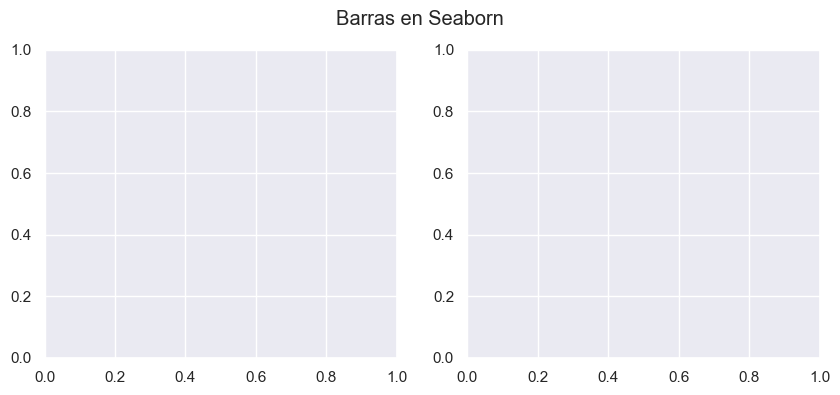

In [9]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Seaborn"); #le da un título a toda la figura, no a las subfiguras

In [ ]:
### Countplot, nos permite frecuencias
sns.countplot(x="embark_town", data = df_titanic, ax = axs[0], hue = "embark_town", legend= False)#count plot es el gráfico en el que nos hace frecuencias absolutas, en x ponemoe la columna embark town, con ax decimos que lo asigne al valor ax0
#axs, tiene los ejes, las dos subfiguras creadas, 0 es la 1, 1 la 2. Hue controla el color de los datos, el color de las categoríasserá distinto según el valor, así asignamos un color diferente a cada valor. No no pinta leyenda
axs[0].set_title("Frecuencias Absolutas embark_town")
#ponemos un título con matplotlip
fig #mostrarlo

In [ ]:
# Para frecuencias relativas... también hay que calcularlas previamente y puedes usar el barplot (si parecido a matplotlib)
valores = df_titanic.embark_town.value_counts(normalize = True) * 100 #el valuecounts, obtiene el value de las ciudades y el counts, esa frecuencia relativa
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1]) #usamos el seabornbarplot, gráfico de barrras de seaborn
#para los valores asignamos un color para cada barra, para cada x que le he dado.
axs[1].set_title("Frecuencias relativas embark_town")
axs[1].set_ylabel("%") #nos pone el tanto por ciento 
fig

### Circulos

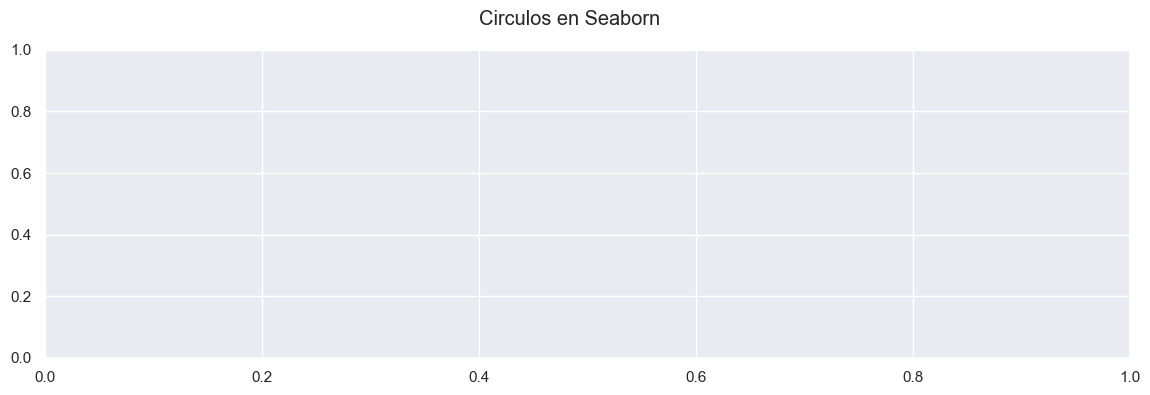

In [10]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(14,4)) #nos devuelve el objeto figure y axes
fig.suptitle("Circulos en Seaborn");

In [ ]:
### Frecuencias absolutas y relativas

frecuencias = df_seguros["state"].value_counts()
df_frecuencias = df_seguros["state"].value_counts().reset_index() #se hace un dataframe con el rest index, dando unma columna de categorías  y en la otra el resultado del value ccounts
df_frecuencias.columns = ["categorias","frecuencias"] 
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000)) #scatter plot, en x los estados en y el valor y es no enm el mismo. para cada estado coge un color
#se aplica al data set,    size el tamaño de las esferas, con sizes
axs.set_xlabel("")
for estado,valor in frecuencias.items(): #se aplica al data set
    axs.text(estado,1.01,f"{valor}({round(valor*100/frecuencias.sum())}%)") #añadimos texto, el nombre del estado y la frecuencia del estaado. El texto estado lo añadimos a x, la y es está un poco para arriva.  
    #valor es el texcto, frecuencia absoluta y luego calculamos la relativa
axs.set_facecolor("none") #quita la cuaddrícula de fondos.
axs.yaxis.set_ticks([]) #los ticks son los números que salen en la gráfica, esto sirve para quitarlos
fig

In [ ]:
### Frecuencias absolutas y relativas
axs.cla()
frecuencias = df_seguros["state"].value_counts()
df_frecuencias = df_seguros["state"].value_counts().reset_index() #se hace un dataframe con el rest index, dando unma columna de categorías  y en la otra el resultado del value ccounts
df_frecuencias.columns = ["categorias","frecuencias"] 
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000)) #scatter plot, en x los estados en y el valor y es no enm el mismo. para cada estado coge un color
#se aplica al data set,    size el tamaño de las esferas, con sizes
axs.set_xlabel("")
for estado,valor in frecuencias.items(): #se aplica al data set
    axs.text(estado,1.01,f"{valor}({round(valor*100/frecuencias.sum())}%)") #añadimos texto, el nombre del estado y la frecuencia del estaado. El texto estado lo añadimos a x, la y es está un poco para arriva.  
    #valor es el texcto, frecuencia absoluta y luego calculamos la relativa
axs.set_facecolor("none") #quita la cuaddrícula de fondos.
axs.yaxis.set_ticks([]) #los ticks son los números que salen en la gráfica, esto sirve para quitarlos
fig
#si añladimos nuevos valores de posicion, se suman los valores, si no queremos que se sumen, deemos poner axs.cla

### Donuts, tartas, quesos

Seaborn no viene con ellos, así que usamos matplotlib

In [ ]:
data = df_titanic["class"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4)) #figura 

ax.pie(data.values,   #creamos un diagrama de tarta con los valores de las frecuencias
        labels=data.index, #nombres de clases
        autopct='%.2f%%', startangle= 90); #el texto que queremos poner dentro de los quesos, usar decimal con dos números decimales detrás de la ,
#El star angle cambia el giro del comienzo.

Ahora tipo donut:

### Lolipops

Este tampoco lo tenemos en seaborn:

In [ ]:
conteo = df_seguros['vehicle_class'].value_counts(ascending=False) #Diagrama de lineas orizontales que terminan en un punto

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index, #valores de la categoría van en y
           xmin= 50, #minimo para enseñar
           xmax=conteo, #maximo
           color='skyblue')
p=plt.gcf() #forma de borrar el fondo
p.gca().set_facecolor("none")
plt.plot(conteo, conteo.index, "o");

# Visualización Aplicada: Mostrando una Variable Numérica

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")

In [ ]:
#AC
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"]) #se convierte la fecha en nuestro índice
df_bitcoin.set_index("fechas", inplace = True)
df_bitcoin.drop("date",axis = 1, inplace = True)
df_bitcoin.head()


### Gráficas y consideraciones

* **Cuándo**: 
    1. Para análisis univariante de dispersión y de outliers. 
    2. Para presentación: Solo para mostrar la forma de la distribución (por ejemplo como justificación de usar una medida de tendencia central, de asumir propiedades de distribuciones con esa forma, etc), buscar la manera de que no sea excesivamente "informativa" (no poner ejes o ponerlos solo con valores minimo y máximo), si hay que resaltar un número poner ese numero bien claro marcándolo. En general no usar boxplots ni similares salvo que la situación lo requiera (contextos científicos, donde se sepa que es un IQR, etc). 
    3. Para series (temporales o secuencias) y diagramas de evolución en Presentaciones: Mostrar la forma y usarlo como complemento estético, contextual o de refuerzo del verdadero mensaje (normalmente periodos de caída, de subida, momentos o puntos de inflexión) y remarcar el mensaje de alguna forma (rodear la zona, anotarla con matplotlib, sobredestacarla...)  

* **Cuándo no**: En presentaciones: Si te los puedes ahorrar mejor :-), salvo que el mensaje sea la propia distribución, evolución, claro.

### Distribución: Histrogramas, Funciones Densidad (KDE), Combinado

In [ ]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_viajes["ingresos"]/1000,#ingreso entre il
             kde=False,#para que no nos pinte el histograma y la densidad de provabilidad
             color='r',
             bins=100, ax = axs)#numero de bines # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Ingresos  (millones)") #cambio etiqueta x e y
axs.set_ylabel("Num_Vuelos");

Veamos ahora el Kernel Density Estimation (KDE) o nuestra estimación de la función de densidad:

In [ ]:
#AC
fg = sns.displot(x="customer_lifetime_value", data = df_seguros,
                 kind = "kde", height = 4, aspect = 3)#estimación de función de densidad, heith moduilka la altura de la figura, aspect, relación ancho y alto
                 #x nombre de la columna y data, de donde quiereo sacar el histograma

# height controla la altura del gráfico
# Aspect la relación ente ancho/alto
# Ojo este gráfico se puede asignar a un "axes" pero en realidad es para mostrar uno por "figure" (es sólo por completitud)

In [ ]:
 #el histograma y el kde, lo ponemos a True para que vayan juntos, en el histograma de arriba, metemos la función de densidad.
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_viajes["ingresos"]/1000,
             kde=True,
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Ingresos  (millones)")
axs.set_ylabel("Num_Vuelos");

### Distribución (II): Caja, Enjambre, Violín

#### Caja

Nuestro querido y conocido diagrama de caja:

In [ ]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.boxplot(x = "total_claim_amount", data = df_seguros); #diagrama de bigotes
axs.set_xlabel("Reclamado  ($)")
axs.set_ylabel("Boxplot");
#la orientación es automática, pero con el parámretro orient, podemos ponerlo horizontal o vertical

### Enjambre 

Este es nuevo y es interesante para análisis, no sé hasta que punto lo es para visualización salvo que en él se vea algo que no se pueda mostrar de otra forma. Este diagrama nos muestra los puntos 

In [ ]:
#enjambre, una variable continua, la considera como una variable ordinal, tantos valores o categorías como valores diferentes puede tener la función
#AC
plt.figure(figsize=(8,6))
sns.swarmplot(x="consumo_kg", data = df_viajes,
              color = "black");
#nos pinta todos los valores cerca de 0, sin que se superpongan

Nos muestra para los valores de consumo los puntos sin solape en cada valor. Se suele complementar con un gráfico de caja o de violín para ver la dispersión y la distribución:

In [ ]:
#nos muestra como se superponen
plt.figure(figsize=(8,6))
sns.boxplot(x = "consumo_kg", data = df_viajes)
sns.swarmplot(x = "consumo_kg", data=df_viajes,
             color="black");

In [ ]:
#nos da los violines
#AC
plt.figure(figsize=(20,5))
sns.violinplot(df_viajes["consumo_kg"], color = "steelblue", orient = "h")

### Evolución: Línea y Área
Nos tenemos que fijar bien en que x genero

In [ ]:
# AC
# Tan sencillo como pintar un gráfico de línea, escogiendo bien el eje-x, por eso cambiamos a la fecha:
sns.lineplot(x= df_bitcoin.index, y = 'close', data = df_bitcoin)
#nmos da la evolución temporal, en este caso de bitcoin

En una visualización deberíamos marcar en el gráfico anterior la parte más destacada, no vale mostrarlo así... Por ejemplo haciendo uso de text y annotations, como vimos en la última sesión de la unidad anterior